In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
house_data = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
house_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
house_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [6]:
len(house_data)

4746

In [7]:
house_data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [8]:
label = LabelEncoder()
house_data['Posted On'] = label.fit_transform(house_data['Posted On'])
house_data['Floor'] = label.fit_transform(house_data['Floor'])
house_data['Area Type'] = label.fit_transform(house_data['Area Type'])
house_data['Area Locality'] = label.fit_transform(house_data['Area Locality'])
house_data['City'] = label.fit_transform(house_data['City'])
house_data['Furnishing Status'] = label.fit_transform(house_data['Furnishing Status'])
house_data['Tenant Preferred'] = label.fit_transform(house_data['Tenant Preferred'])
house_data['Point of Contact'] = label.fit_transform(house_data['Point of Contact'])

In [9]:
house_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,26,2,10000,1100,455,2,221,4,2,1,2,2
1,21,2,20000,800,14,2,1527,4,1,1,1,2
2,24,2,17000,1000,14,2,1760,4,1,1,1,2
3,73,2,10000,800,10,2,526,4,2,1,1,2
4,17,2,7500,850,10,1,1890,4,2,0,1,2


In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Posted On          4746 non-null   int32
 1   BHK                4746 non-null   int64
 2   Rent               4746 non-null   int64
 3   Size               4746 non-null   int64
 4   Floor              4746 non-null   int32
 5   Area Type          4746 non-null   int32
 6   Area Locality      4746 non-null   int32
 7   City               4746 non-null   int32
 8   Furnishing Status  4746 non-null   int32
 9   Tenant Preferred   4746 non-null   int32
 10  Bathroom           4746 non-null   int64
 11  Point of Contact   4746 non-null   int32
dtypes: int32(8), int64(4)
memory usage: 296.8 KB


<AxesSubplot:xlabel='BHK', ylabel='Rent'>

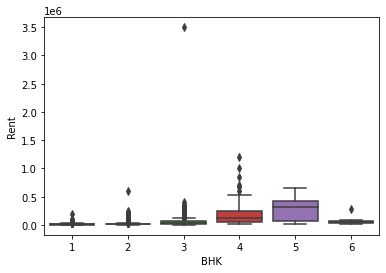

In [11]:
sns.boxplot(x=house_data['BHK'],y=house_data['Rent'],data=house_data)

<AxesSubplot:xlabel='Rent', ylabel='Count'>

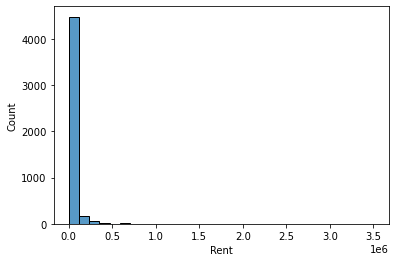

In [12]:
sns.histplot(x=house_data['Rent'],bins=30)

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

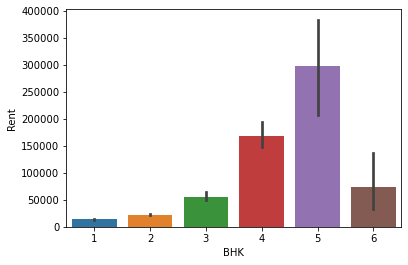

In [13]:
sns.barplot(x=house_data['BHK'],y=house_data['Rent'],data=house_data)

<AxesSubplot:>

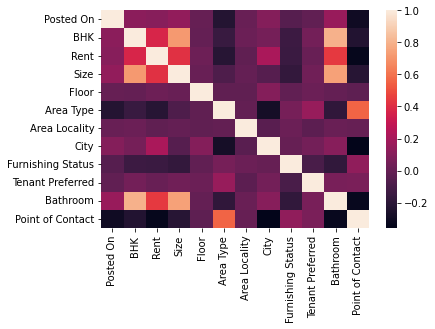

In [14]:
sns.heatmap(house_data.corr())

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = house_data.drop('Rent',axis=1).values

In [17]:
y = house_data['Rent'].values

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=0)

In [19]:
len(x_train)

1423

In [20]:
len(y_train)

1423

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linear = LinearRegression()

In [23]:
linear.fit(x_train,y_train)

LinearRegression()

In [24]:
linear_score = linear.score(x_test,y_test)
linear_score

0.23939697231995738